C:\Users\purav\AppData\Local\Temp\ipykernel_14932\3097561072.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid["centroid"] = grid.geometry.centroid


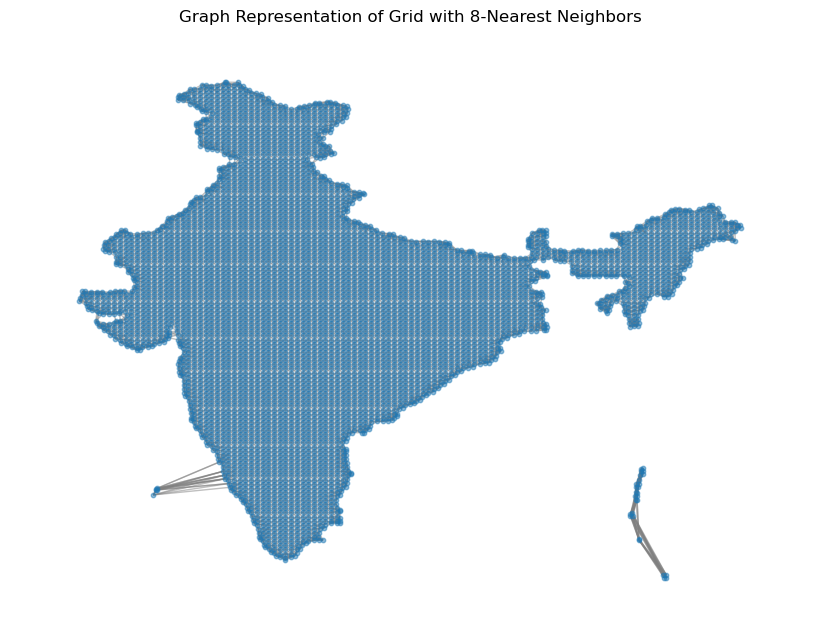

In [ ]:
import geopandas as gpd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# Load the grid with mapped data
grid_path = r"C:\Users\purav\OneDrive\Desktop\Fi Year Project\Final-Year-Project\Data\Processed\grid_with_data.geojson"
grid = gpd.read_file(grid_path)

# Extract centroids as node positions
grid["centroid"] = grid.geometry.centroid
node_positions = np.array([(p.x, p.y) for p in grid["centroid"]])

# Build KDTree for nearest neighbor search
tree = cKDTree(node_positions)
k = 8  # Number of nearest neighbors
distances, indices = tree.query(node_positions, k=k+1)  # +1 to exclude self

# Construct graph
G = nx.Graph()

# Add nodes with attributes
for i, (x, y) in enumerate(node_positions):
    G.add_node(i, pos=(x, y), temperature=grid.loc[i, "temperature_2023"], rainfall=grid.loc[i, "rainfall_2023"])

# Add edges based on 8-nearest neighbors
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:  # Skip the first neighbor (self)
        G.add_edge(i, j)

# Visualization
plt.figure(figsize=(8, 6))
pos = {i: (x, y) for i, (x, y) in enumerate(node_positions)}
nx.draw(G, pos, node_size=10, edge_color="gray", alpha=0.5, with_labels=False)
plt.title("Graph Representation of Grid with 8-Nearest Neighbors")
plt.show()


C:\Users\purav\AppData\Local\Temp\ipykernel_9692\2197302724.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid["centroid"] = grid.geometry.centroid


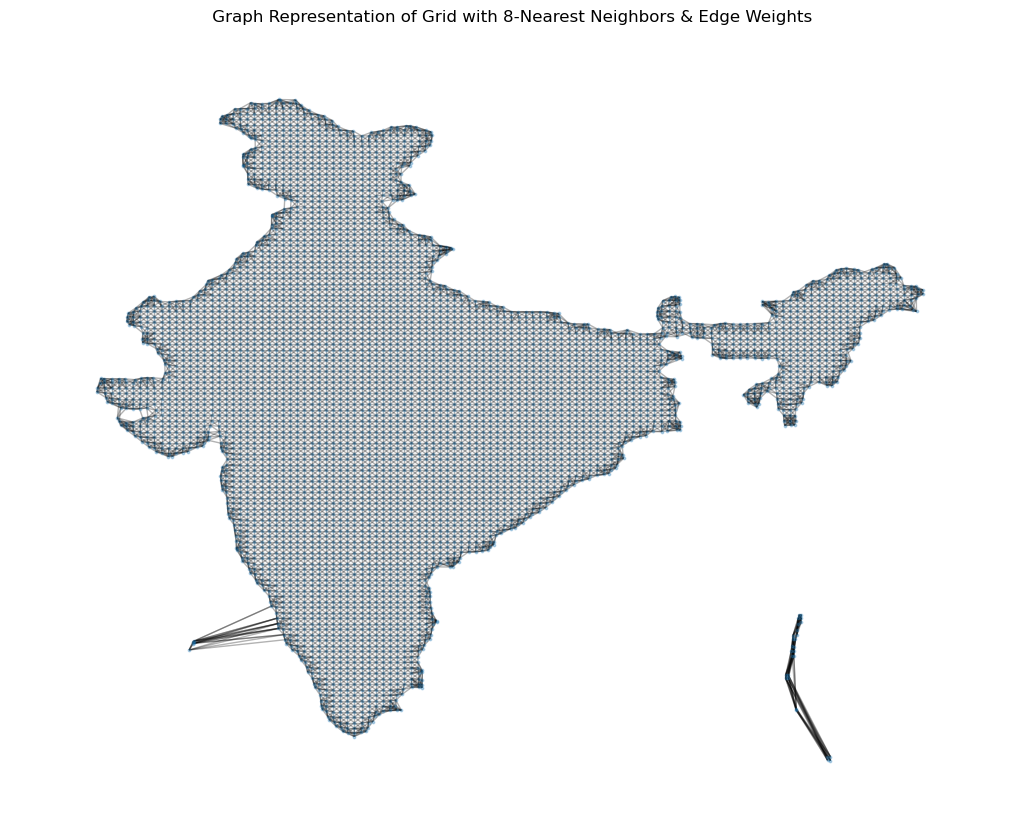

In [4]:
import geopandas as gpd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# Load the grid with mapped data
grid_path = r"C:\Users\purav\OneDrive\Desktop\Fi Year Project\Final-Year-Project\Data\Processed\grid_with_data.geojson"
grid = gpd.read_file(grid_path)

# Extract centroids as node positions
grid["centroid"] = grid.geometry.centroid
node_positions = np.array([(p.x, p.y) for p in grid["centroid"]])

# Build KDTree for nearest neighbor search
tree = cKDTree(node_positions)
k = 8  # Number of nearest neighbors
distances, indices = tree.query(node_positions, k=k+1)  # +1 to exclude self

# Construct graph
G = nx.Graph()

# Add nodes with attributes
for i, (x, y) in enumerate(node_positions):
    G.add_node(i, pos=(x, y), temperature=grid.loc[i, "temperature_2023"], rainfall=grid.loc[i, "rainfall_2023"])

# Add edges with weights based on Euclidean distance
for i, (neighbor_indices, neighbor_distances) in enumerate(zip(indices, distances)):
    for j, dist in zip(neighbor_indices[1:], neighbor_distances[1:]):  # Skip the first neighbor (self)
        G.add_edge(i, j, weight=dist)

# Visualization
plt.figure(figsize=(10, 8))
pos = {i: (x, y) for i, (x, y) in enumerate(node_positions)}

# Extract edges and weights
edges = G.edges(data=True)
edge_weights = [d["weight"] for _, _, d in edges]

# Normalize edge weights for better contrast
max_weight = max(edge_weights)

# Draw graph with transparency and adjusted node size
nx.draw(G, pos, node_size=3, edge_color='black', edge_cmap=plt.cm.Blues, alpha=0.3, with_labels=False)

plt.title(" Graph Representation of Grid with 8-Nearest Neighbors & Edge Weights")
plt.show()
